In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np


In [2]:
# rfm_all = pd.read_csv('data/data-trans/final_rfm_monthly.csv', low_memory=False)
rfm_filled = pd.read_csv('data/data-trans/classification_rfm_monthly.csv', low_memory=False)

In [3]:
rfm_filled

,bid,recency_t,frequency_t,monetary_t,recency_ec,frequency_ec,monetary_ec,recency_fc,frequency_fc,monetary_fc,cluster_fc,cluster_ec,cluster_t
0,3551.0,61.0,0.0,0.0,30.0,5.0,52425.0,61.0,0.0,0.0,0,1,1
1,3552.0,61.0,0.0,0.0,30.0,23.0,283125.0,61.0,0.0,0.0,0,3,1
2,3553.0,10.0,6.0,39600.0,37.0,11.0,63395.0,48.0,2.0,6540.0,1,1,2
3,3554.0,17.0,7.0,9000.0,38.0,2.0,7306.0,61.0,0.0,0.0,0,4,3
4,3555.0,61.0,0.0,0.0,5.0,7.0,19805.0,61.0,0.0,0.0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123164,161739.0,22.0,1.0,3500.0,61.0,0.0,0.0,61.0,0.0,0.0,0,0,0
123165,161740.0,2.0,2.0,0.0,61.0,0.0,0.0,61.0,0.0,0.0,0,0,1
123166,161741.0,4.0,2.0,7800.0,61.0,0.0,0.0,61.0,0.0,0.0,0,0,0
123167,161742.0,2.0,2.0,0.0,61.0,0.0,0.0,61.0,0.0,0.0,0,0,1


In [10]:
rfm_fc = rfm_filled[['recency_fc','frequency_fc','monetary_fc', 'cluster_fc']]
rfm_t = rfm_filled[['recency_t','frequency_t','monetary_t', 'cluster_t']]
rfm_ec = rfm_filled[['recency_ec','frequency_ec','monetary_ec', 'cluster_ec']]

In [43]:
def cluster_analysis(name, df):
    # Group by cluster and calculate various statistics for specific columns
    cluster_analysis = df.groupby(f'cluster_{name}').agg({
        f'recency_{name}': ['mean', 'median', 'std', 'min', 'max'],
        f'frequency_{name}': ['mean', 'median', 'std', 'min', 'max'],
        f'monetary_{name}': ['mean', 'median', 'std', 'min', 'max']
    })

    # Beautify the output using pandas styling
    styled_cluster_analysis = cluster_analysis.style\
        .highlight_max(color='red')\
        .highlight_min(color='blue')\
        .set_caption('Cluster Analysis Summary')\
        .format("{:.2f}")


    # Plotting boxplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Boxplot for Recency
    sns.boxplot(x=f'cluster_{name}', y=f'recency_{name}', hue=f'cluster_{name}', data=df, ax=axes[0], palette='viridis', legend=False)
    axes[0].set_title(f'Recency by Cluster')

    # Boxplot for Frequency
    sns.boxplot(x=f'cluster_{name}', y=f'frequency_{name}', hue=f'cluster_{name}', data=df, ax=axes[1], palette='viridis', legend=False)
    axes[1].set_title(f'Frequency by Cluster')

    # Boxplot for Monetary
    sns.boxplot(x=f'cluster_{name}', y=f'monetary_{name}', hue=f'cluster_{name}', data=df, ax=axes[2], palette='viridis', legend=False)
    axes[2].set_title(f'Monetary by Cluster')

    # Remove legends if they exist
    for ax in axes:
        try:
            ax.get_legend().remove()
        except AttributeError:
            pass

    plt.tight_layout()
    plt.show()

    return styled_cluster_analysis

### FC cluster analysis

In [11]:
rfm_fc

,recency_fc,frequency_fc,monetary_fc,cluster_fc
0,61.0,0.0,0.0,0
1,61.0,0.0,0.0,0
2,48.0,2.0,6540.0,1
3,61.0,0.0,0.0,0
4,61.0,0.0,0.0,0
...,...,...,...,...
123164,61.0,0.0,0.0,0
123165,61.0,0.0,0.0,0
123166,61.0,0.0,0.0,0
123167,61.0,0.0,0.0,0


In [12]:
rfm_fc['cluster_fc'].value_counts()

cluster_fc
0    102718
1     11479
2      4600
3      4372
Name: count, dtype: int64

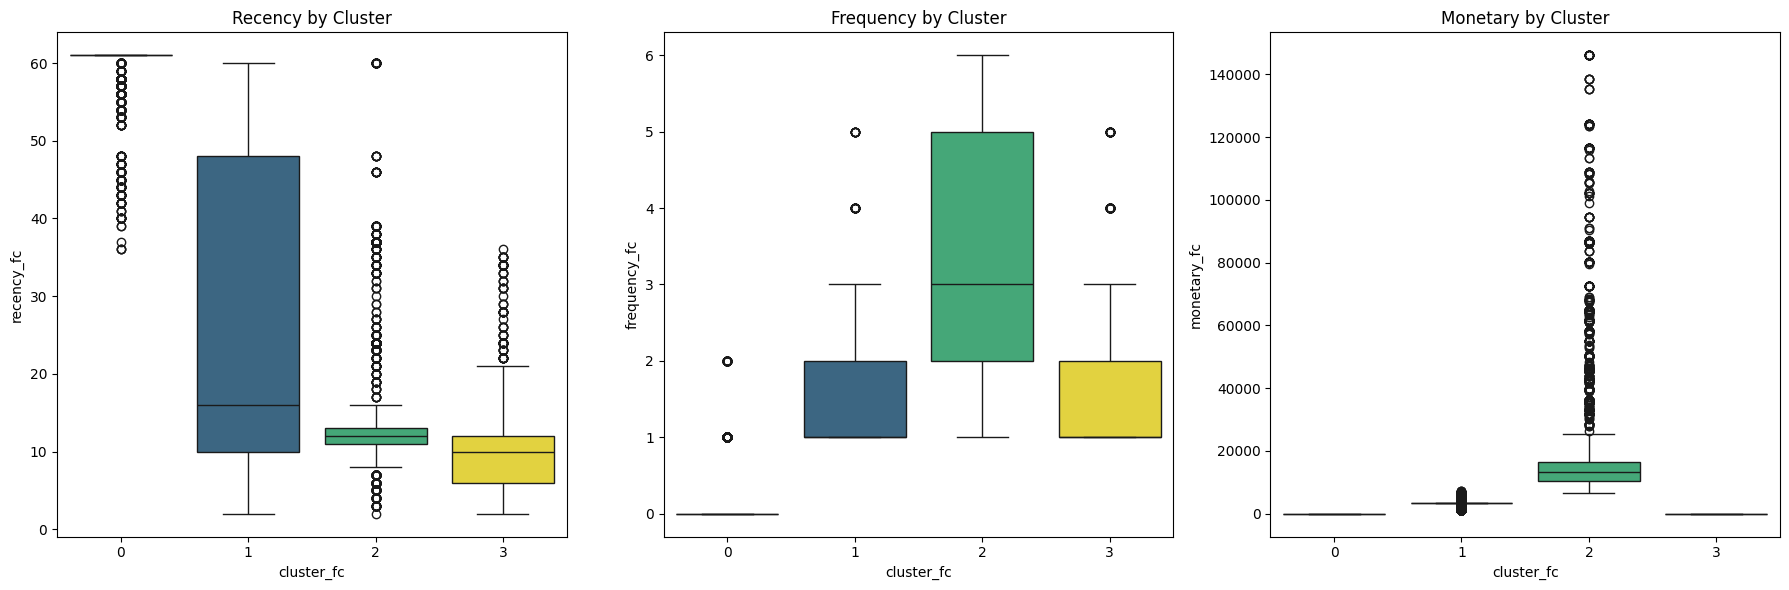

In [44]:
cluster_analysis('fc', rfm_fc)

### EC cluster analysis

In [6]:
rfm_ec

,bid,recency_ec,frequency_ec,monetary_ec,cluster_ec
0,3551.0,30.0,5.0,52425.0,1
1,3552.0,30.0,23.0,283125.0,3
2,3553.0,37.0,11.0,63395.0,1
3,3554.0,38.0,2.0,7306.0,4
4,3555.0,5.0,7.0,19805.0,4
...,...,...,...,...,...
123164,161739.0,61.0,0.0,0.0,0
123165,161740.0,61.0,0.0,0.0,0
123166,161741.0,61.0,0.0,0.0,0
123167,161742.0,61.0,0.0,0.0,0


In [22]:
rfm_ec['cluster_ec'].value_counts()

cluster_ec
0    118360
4      1447
2      1409
1      1332
3       621
Name: count, dtype: int64

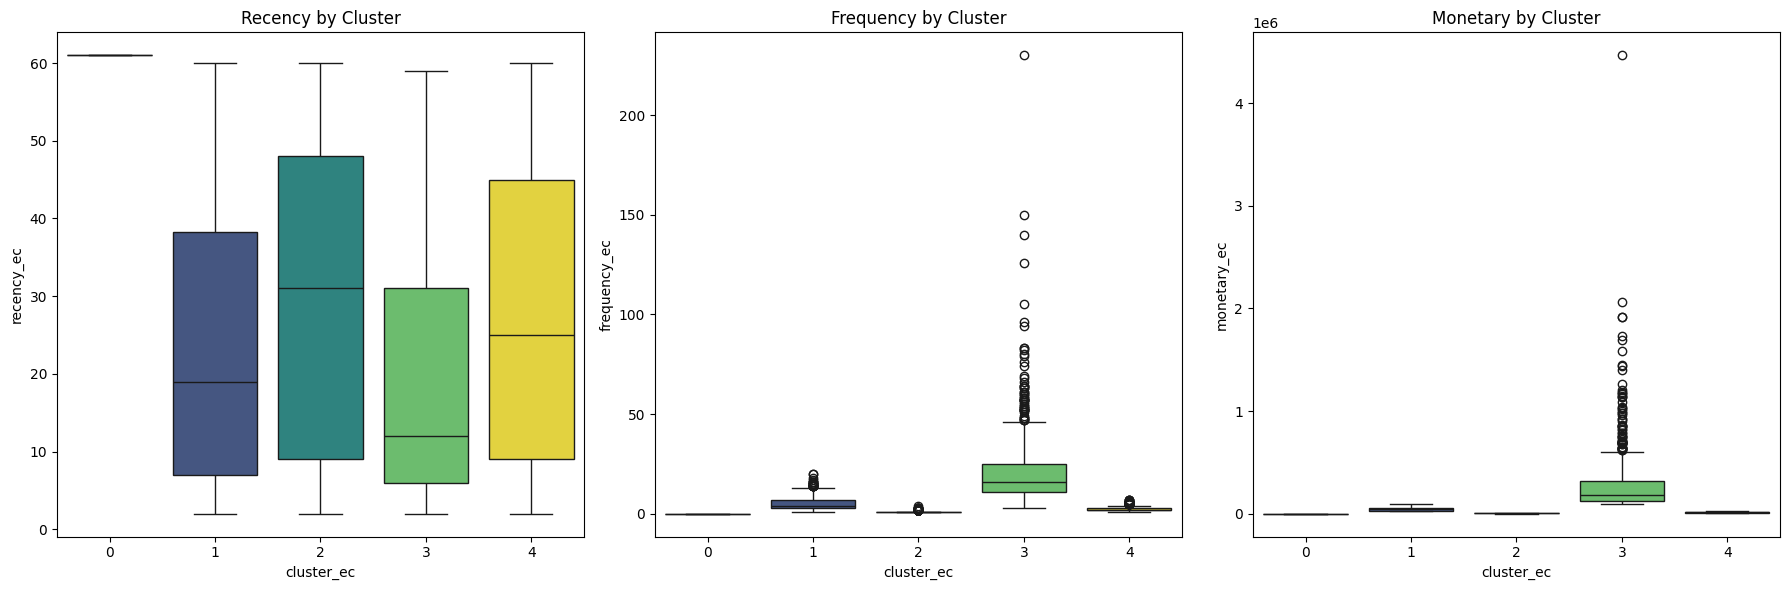

In [45]:
cluster_analysis('ec', rfm_ec)

### Ticket cluster analysis

In [7]:
rfm_t

,bid,recency_t,frequency_t,monetary_t,cluster_t
0,3551.0,61.0,0.0,0.0,1
1,3552.0,61.0,0.0,0.0,1
2,3553.0,10.0,6.0,39600.0,2
3,3554.0,17.0,7.0,9000.0,3
4,3555.0,61.0,0.0,0.0,1
...,...,...,...,...,...
123164,161739.0,22.0,1.0,3500.0,0
123165,161740.0,2.0,2.0,0.0,1
123166,161741.0,4.0,2.0,7800.0,0
123167,161742.0,2.0,2.0,0.0,1


In [28]:
rfm_t['cluster_t'].value_counts()

cluster_t
1    44779
0    32681
3    23661
4    14718
2     7330
Name: count, dtype: int64

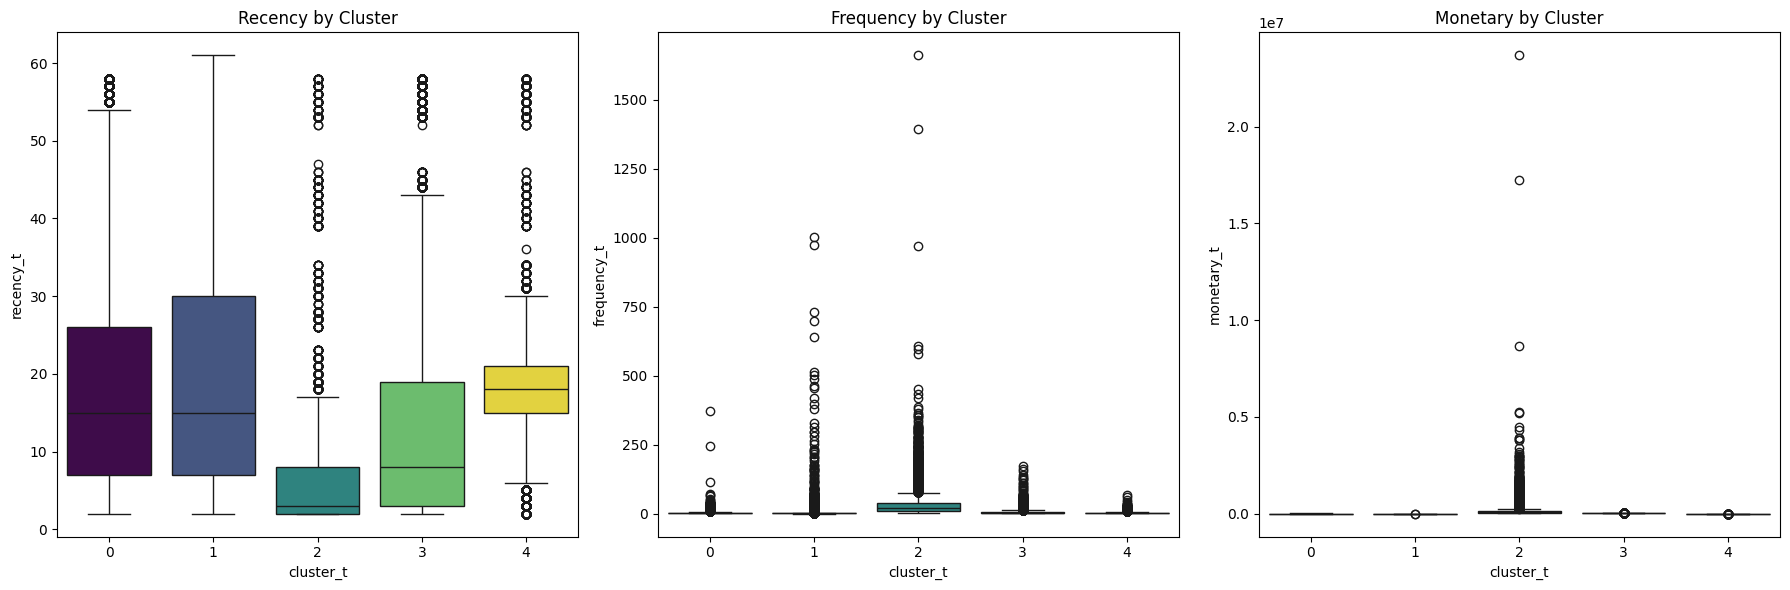

In [46]:
cluster_analysis('t', rfm_t)